In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import seq2seq_model
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt


2023-05-04 05:59:26.896359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('Data/4105819v2474763.csv', index_col=0)
df

,lpt odds,r1 spread,r1 pup,r2 spread,r2 pup,r1_sets_to_win,r2_sets_to_win,enhanced_markov
2018-07-11 16:36:42,0.582314,0.005831,0.076386,0.016807,0.002012,3.0,3.0,0.507162
2018-07-11 16:36:44,0.582350,0.005831,0.076386,0.016807,0.002012,3.0,3.0,0.507162
2018-07-11 16:36:46,0.582387,0.005831,0.074565,0.024288,0.002396,3.0,3.0,0.507162
2018-07-11 16:36:48,0.582423,0.005831,0.072341,0.029768,0.003003,3.0,3.0,0.507162
2018-07-11 16:36:50,0.582460,0.005831,0.070063,0.032151,0.003397,3.0,3.0,0.507162
...,...,...,...,...,...,...,...,...
2018-07-11 19:32:56,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000
2018-07-11 19:32:58,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000
2018-07-11 19:33:00,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000
2018-07-11 19:33:02,0.000000,1.595506,0.206208,0.048309,0.725523,2.0,0.0,0.000000


In [3]:
data = df.to_numpy()
data

array([[0.58231363, 0.0058309 , 0.07638615, ..., 3.        , 3.        ,
        0.50716188],
       [0.58235018, 0.0058309 , 0.07638615, ..., 3.        , 3.        ,
        0.50716188],
       [0.58238673, 0.0058309 , 0.07456494, ..., 3.        , 3.        ,
        0.50716188],
       ...,
       [0.        , 1.59550562, 0.20620843, ..., 2.        , 0.        ,
        0.        ],
       [0.        , 1.59550562, 0.20620843, ..., 2.        , 0.        ,
        0.        ],
       [0.        , 1.59550562, 0.20620843, ..., 2.        , 0.        ,
        0.        ]])

In [4]:
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(test.shape, train.shape)

(1059, 8) (4233, 8)


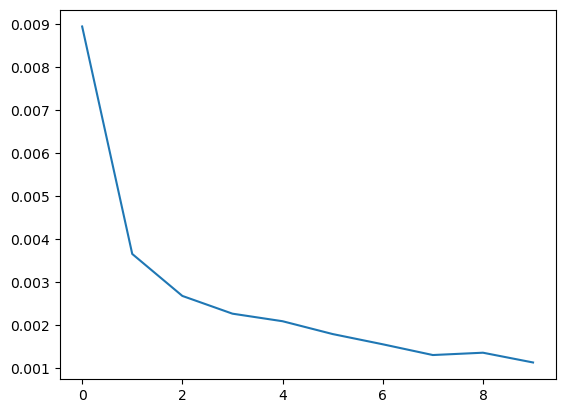

In [5]:
hist = pd.read_csv('train_hist.csv')
plt.plot(hist['mse'])

In [6]:
model = load_model("seq2seq_model")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 90, 8)]      0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 200),        167200      ['input_1[0][0]']                
                                 (None, 200),                                                     
                                 (None, 200)]                                                     
                                                                                                  
 batch_normalization (BatchNorm  (None, 200)         800         ['lstm[0][1]']                   
 alization)                                                                                   

In [7]:
score, scores, actual, predicted = seq2seq_model.evaluate_model(model, train, test, 3, 30, features=[0, 5, 6])

(4233, 8) (1059, 8)
(35, 30, 3) (141, 30, 3)


ValueError: in user code:

    File "/home/konny135/anaconda3/envs/ML/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/home/konny135/anaconda3/envs/ML/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/konny135/anaconda3/envs/ML/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/home/konny135/anaconda3/envs/ML/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/home/konny135/anaconda3/envs/ML/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/konny135/anaconda3/envs/ML/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 90, 8), found shape=(None, 90, 3)


RMSE:  0.1658276539518089


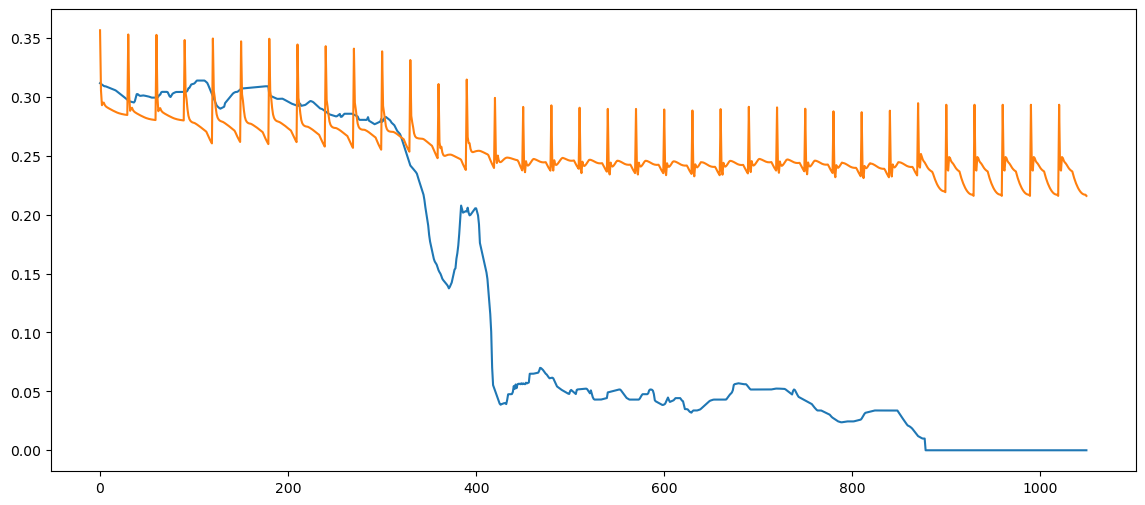

In [8]:
print('RMSE: ', score)
actual_odds = actual.reshape((actual.shape[0]*actual.shape[1]))
predicted_odds = predicted.reshape((predicted.shape[0]*predicted.shape[1]))
plt.figure(figsize=(14,6))
plt.plot(actual_odds)
plt.plot(predicted_odds)